### 12.1
Suppose $e(x^k)$ is the error measure of some algorithm at point $x^k$. Illustrate the rate of convergence of this algorithm when
- $e(x^k) = 1/4^{\lfloor k/2 \rfloor}$
- $e(x^k) = 1/2^{2^k}$

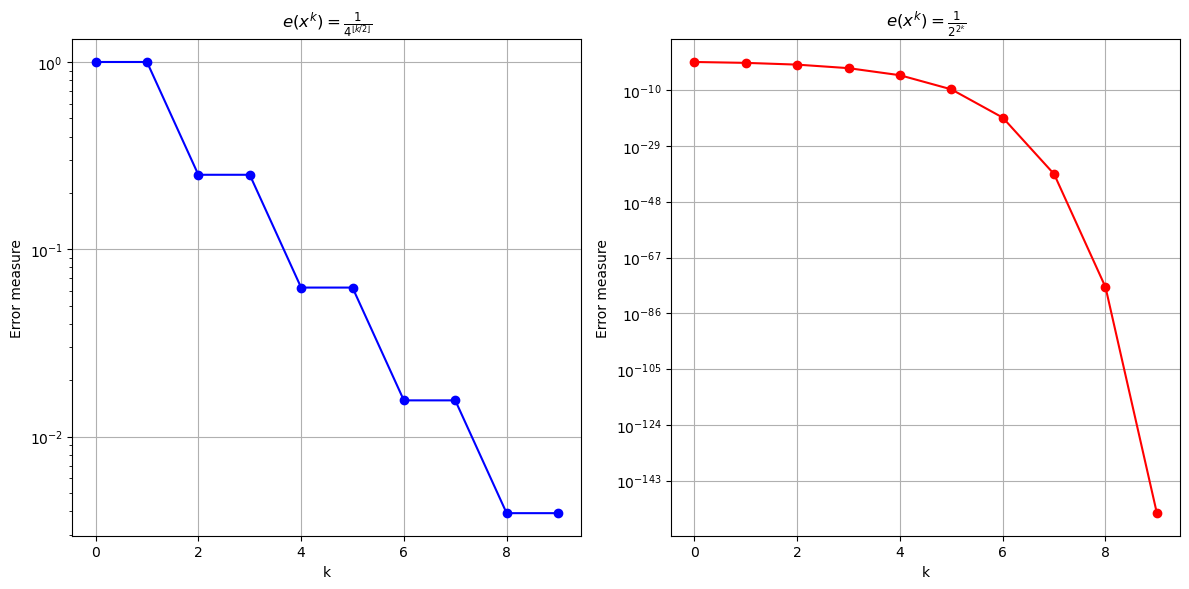

In [24]:
import numpy as np
import matplotlib.pyplot as plt

k = np.arange(0, 10, 1)

e1 = np.power(1 / 4, np.floor(k / 2))
e2 = np.power(1 / 2, np.power(2, k))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k, e1, marker='o', linestyle='-', color='b')
plt.yscale('log')
plt.title(r'$e(x^k) = \frac{1}{4^{\lfloor k/2 \rfloor}}$')
plt.xlabel('k')
plt.ylabel('Error measure')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k, e2, marker='o', linestyle='-', color='r')
plt.yscale('log')
plt.title(r'$e(x^k) = \frac{1}{2^{2^k}}$')
plt.xlabel('k')
plt.ylabel('Error measure')
plt.grid(True)

plt.tight_layout()
plt.show()

### 12.2
Computational problem:
- Randomly generate a convex quadratic function:
  $$
  f(x)=\frac{1}{2}x^\top Ax+b^\top x
  $$
  with $b$ randomly drawn from $[-1,1]^n$ and $A = B^\top B +D$, where $B$ is a random sparse matrix, and $D$ is a nonnegative diagonal matrix.
- Implement the gradient descent method (i.e. the direction $d^k=-\nabla f(x^k)$) using the following stepsize rules: constant, diminishing, Armijo, and exact minimization rule (i.e. $\alpha_k =\argmin_\alpha f(x^k+\alpha d^k)$)
- Your submitted work should include a brief description of your implementation, a few simulation gures (plotted by computer) such as function values vs iteration numbers, that can illustrate the performance of the stepsize rules for di erent problem sizes.

In [25]:
import numpy as np

def generate_convex_quadratic(n):
    b = np.random.uniform(-1, 1, n)
    B = np.random.randn(n, n) * (np.random.rand(n, n) < 0.1)
    D = np.diag(np.random.rand(n))
    A = B.T @ B + D
    return A, b

n = 100
A, b = generate_convex_quadratic(n)

In [26]:
def gradient_descent(A, b, x0, stepsize_rule, max_iter=200, tol=1e-6):
    def f(x):
        return 0.5 * x.T @ A @ x + b.T @ x

    def grad_f(x):
        return A @ x + b
    
    x = x0
    f_values = [f(x)]
    
    for k in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        
        if stepsize_rule == 'constant':
            alpha = 0.01
        elif stepsize_rule == 'diminishing':
            alpha = 0.1 / (k + 1)
        elif stepsize_rule == 'armijo':
            alpha = 1.0
            beta = 0.5
            sigma = 0.1
            while f(x - alpha * grad) > f(x) - sigma * alpha * np.linalg.norm(grad)**2:
                alpha *= beta
        elif stepsize_rule == 'exact':
            alpha = np.linalg.norm(grad)**2 / (grad.T @ A @ grad)
        
        x = x - alpha * grad
        f_values.append(f(x))
    
    return x, f_values

x0 = np.random.randn(n)

x_const, f_values_const = gradient_descent(A, b, x0, 'constant')
x_diminish, f_values_diminish = gradient_descent(A, b, x0, 'diminishing')
x_armijo, f_values_armijo = gradient_descent(A, b, x0, 'armijo')
x_exact, f_values_exact = gradient_descent(A, b, x0, 'exact')

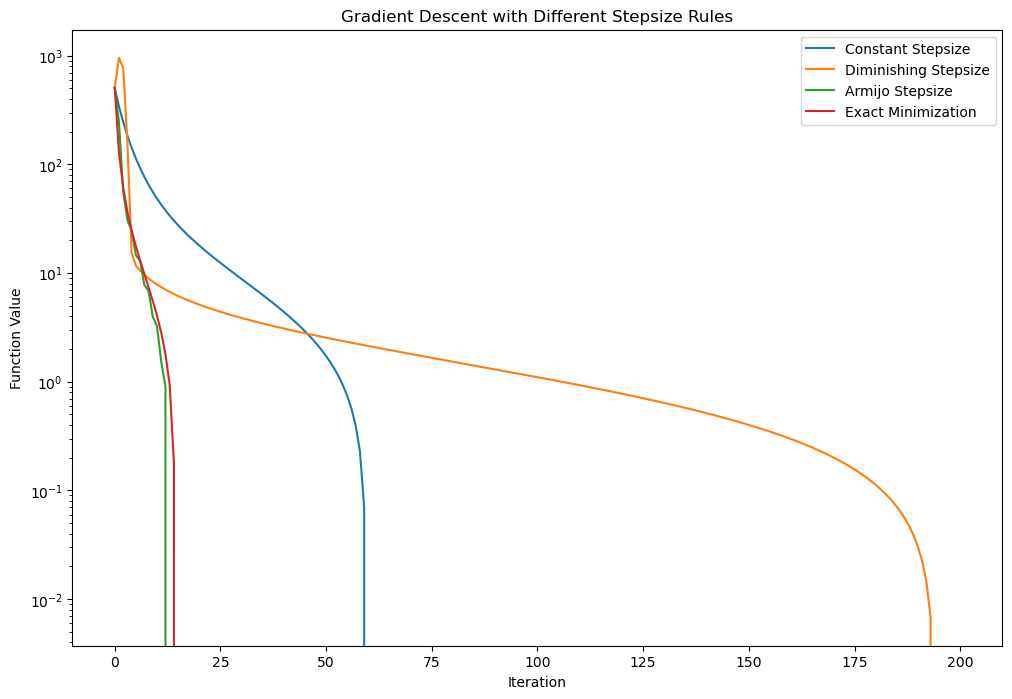

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(f_values_const, label='Constant Stepsize')
plt.plot(f_values_diminish, label='Diminishing Stepsize')
plt.plot(f_values_armijo, label='Armijo Stepsize')
plt.plot(f_values_exact, label='Exact Minimization')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.yscale('log')
plt.legend()
plt.title('Gradient Descent with Different Stepsize Rules')
plt.show()